In [1]:
import numpy as np
import os
import pyfftw as ft
import time

1. NxNxN is the number of grid points used in DNS computations.
2. Divide X-axis equally in all processors (nx=N/8).
3. Create objects/instances of the classes to be used later in the computations

In [2]:
#1.
N=1024
nproc=8
#2.
nx=N//nproc
ny=N
nz=N

In [3]:
t1=time.time()
u=ft.zeros_aligned((N,N,N), dtype='float32')
v=ft.zeros_aligned((N,N,N), dtype='float32')
w=ft.zeros_aligned((N,N,N), dtype='float32')
folder='/home/idies/workspace/scratch/'
nproc=8 
for k in range(nproc):
    filename='ref-isotropic1024coarse-'+str(k)+'-(t=0.0).npz'
    file=folder+filename
    content=np.load(file)
    if(int(content['nproc'])!=nproc):
        print("Unmatched number of processes. Must first pre-process to adequate number of process")
    u[k*nx:(k+1)*nx,:,:]=content['vx']
    v[k*nx:(k+1)*nx,:,:]=content['vy']
    w[k*nx:(k+1)*nx,:,:]=content['vz']
t2=time.time()
print(t2-t1)

227.98809385299683


In [4]:
t1=time.time()
wiz=(b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)
fo=ft.zeros_aligned((N,N,N),dtype='float32')
bo=ft.zeros_aligned((N,N,N//2+1),dtype='complex64')
fft_object=ft.FFTW(fo,bo,axes=(0,1,2),direction='FFTW_FORWARD',flags=('FFTW_MEASURE',),threads=8)
t2=time.time()
print(t2-t1)

55.433836698532104


In [5]:
t1=time.time()
cu=ft.zeros_aligned((N,N,N//2+1),dtype='complex64')
cv=ft.zeros_aligned((N,N,N//2+1),dtype='complex64')
cw=ft.zeros_aligned((N,N,N//2+1),dtype='complex64')
t2=time.time()
print(t2-t1)

83.18066906929016


In [6]:
t1=time.time()
fo[:,:,:]=u[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cu[:,:,:]=bo[:,:,:]

fo[:,:,:]=v[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cv[:,:,:]=bo[:,:,:]

fo[:,:,:]=w[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cw[:,:,:]=bo[:,:,:]

t2=time.time()
print(t2-t1)

142.63237190246582


In [ ]:
t1=time.time()
fft_object=ft.FFTW(fo,bo,axes=(0,1,2),direction='FFTW_FORWARD',flags=('FFTW_MEASURE',),threads=8)
ifft_object=ft.FFTW(bo,fo,axes=(0,1,2),direction='FFTW_BACKWARD',flags=('FFTW_MEASURE',),threads=8)
t2=time.time()
print(t2-t1)

#### Load velocity fields u, v, and w from the $\color{red}{\text{scratch}}$ folder. If the data is not available then first download the data using notebook $\color{blue}{\text{DownloadAndSaveDNSdataset.ipynb}}$

In [4]:
%%px
dirName='/home/idies/workspace/scratch/dataSnapshot/'
comm.Barrier(); t1=MPI.Wtime()
#fileNameInitial='veldata_t1p0_myID'
#u,v,w=myDDL.LoadDataFromSinglefile(dirName,fileNameInitial,nproc,my_id,N)
fileNameInitial='veldata_t0p0_myID'
u,v,w=myDDL.LoadDataFromVM(dirName,fileNameInitial,nproc,my_id,nx,ny,nz)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

[stdout:7] Done!! Cost= 22.02 seconds


#### Transform velocity field from $\color{red}{\text{physical}}$ to $\color{blue}{\text{Fourier space}}$

In [5]:
%%px
comm.Barrier(); t1=MPI.Wtime()
cu=myFO.GetFFT3Dfield(u)
cv=myFO.GetFFT3Dfield(v)
cw=myFO.GetFFT3Dfield(w)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

[stdout:7] Done!! Cost= 78.80 seconds


#### Get the wavenumber grids

In [6]:
%%px
comm.Barrier(); t1=MPI.Wtime()
k2,kx,ky,kz=myFO.GetWavenumbers()
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

[stdout:7] Done!! Cost= 18.41 seconds


#### Calculate radial energy in wavenumber space and plot its spectrum

In [7]:
%%px
#1.
comm.Barrier(); t1=MPI.Wtime()
ek_unfltrd,ks=myQOI.GetEnergySpectrum(cu,cv,cw,k2)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! Cost: {0:.2f} seconds\n'.format(t2-t1))

[stdout:1] Done!! Cost: 20.74 seconds


[output:1]

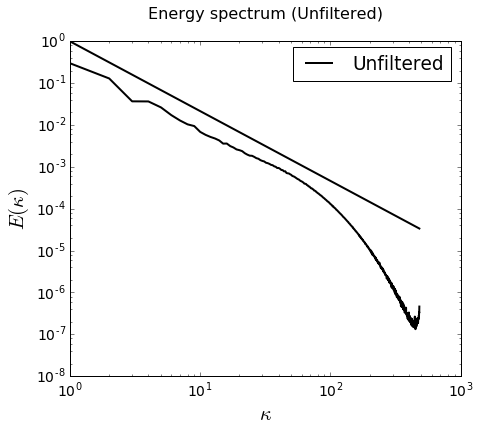

In [8]:
%%px
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
if(my_id==0):    
    SIZE = 12
    plt.rc('font', size=SIZE)  # controls default text sizes
    plt.rc('axes', titlesize=SIZE+4)  # fontsize of the axes title
    plt.rc('axes', labelsize=SIZE+8)  # fontsize of the x any y labels
    plt.rc('xtick', labelsize=SIZE+2)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=SIZE+2)  # fontsize of the tick labels
    plt.rc('legend', fontsize=SIZE+6.5)   # legend fontsize
    plt.rc('figure', titlesize=SIZE+4)  # size of the figure title
    plt.figure(figsize=(7,6))
    symbPos=[1,4,16];lw=2;ms=10
    plt.loglog(ks,ek_unfltrd,'-k',linewidth=lw,markersize=ms,fillstyle='full',label='Unfiltered')
    plt.loglog(ks,np.power(ks,-5/3),'-k',linewidth=2)
    plt.xlabel('$\kappa$')
    plt.ylabel('$E(\kappa)$')
    plt.title('Energy spectrum (Unfiltered)\n')
    plt.axis([0.0,1000.0, 1e-8,1.0e0])
    plt.legend(loc=0,bbox_to_anchor=(1.0, 1.01),ncol=1,fancybox=False,shadow=False)
    #plt.legend(loc='outside', shadow=True) #loc='upper center'
    ax = plt.gca()
    ax.set_autoscale_on(False)

#### Get velocity gradient tensor in Physical space

In [7]:
%%px
#1.
comm.Barrier(); t1=MPI.Wtime()
A11=myQOI.GetVelocityGradient(cu,kx)
A12=myQOI.GetVelocityGradient(cu,ky)
A13=myQOI.GetVelocityGradient(cu,kz)
A21=myQOI.GetVelocityGradient(cv,kx)
A22=myQOI.GetVelocityGradient(cv,ky)
A23=myQOI.GetVelocityGradient(cv,kz)
A31=myQOI.GetVelocityGradient(cw,kx)
A32=myQOI.GetVelocityGradient(cw,ky)
A33=myQOI.GetVelocityGradient(cw,kz)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! cost= %0.2f seconds\n' %(t2-t1))

[stdout:7] Done!! cost= 290.84 seconds


#### Reduce the sample size to avoid any memory related issue

In [10]:
%%px
#2.
Nchosen=(nx*ny*nz)//8
rng=np.random.randint(nx*ny*nz,size=Nchosen)
a11=A11[rng]
a12=A12[rng]
a13=A13[rng]
a21=A21[rng]
a22=A22[rng]
a23=A23[rng]
a31=A31[rng]
a32=A32[rng]
a33=A33[rng]

#### Obtain second and third invariants of velocity gradient tensor

In [11]:
%%px
comm.Barrier(); t1=MPI.Wtime()
#3.
q=myQOI.GetQ(a11,a12,a13,a21,a22,a23,a31,a32,a33)
r=myQOI.GetR(a11,a12,a13,a21,a22,a23,a31,a32,a33)
#4.
qwAvg_unfltrd=myQOI.GetQwAvg(a12,a21,a13,a31,a23,a32)
q=q/qwAvg_unfltrd
r=r/(qwAvg_unfltrd**1.5)
#5.
#topoFrac_unfltrd=myQOI.GetTopologyFraction(q,r)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! cost= %0.2f minutes\n' %(((t2-t1)/60.)))

[stdout:1] Done!! cost= 0.42 minutes


#### Get the joint probability distribution function of Q and R, and plot its well-known tear-drop shape

In [26]:
%%px
comm.Barrier(); t1=MPI.Wtime()
Ngrid=500;rmin=-25.0;rmax=25.0;qmin=-25.0;qmax=25.0 # Constants for jPDF
jPDF_unfltrd,xedges_unfltrd,yedges_unfltrd=\
myStats.FindJointPDF(r.flatten(),q.flatten(),rmin,rmax,qmin,qmax,Ngrid,Ngrid)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! cost= %0.2f minutes\n' %(((t2-t1)/60.)))

[stdout:1] Done!! cost= 0.09 minutes


[output:1]

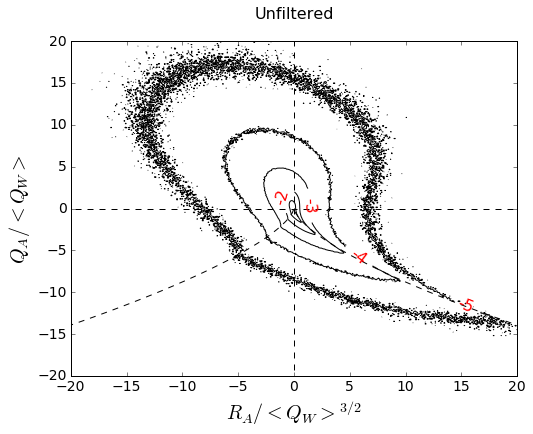

In [27]:
%%px
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
if(my_id==0):
    fmt={}
    plt.figure()
    SIZE = 12
    plt.rc('font', size=SIZE)  # controls default text sizes
    plt.rc('axes', titlesize=SIZE+4)  # fontsize of the axes title
    plt.rc('axes', labelsize=SIZE+8)  # fontsize of the x any y labels
    plt.rc('xtick', labelsize=SIZE+2)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=SIZE+2)  # fontsize of the tick labels
    plt.rc('legend', fontsize=SIZE)  # legend fontsize
    plt.rc('figure', titlesize=SIZE+4)  # # size of the figure title
    plt.figure(figsize=(8,6))

    X,Y=np.meshgrid(xedges_unfltrd[0:Ngrid-1],yedges_unfltrd[0:Ngrid-1])

    levels=np.logspace(-5.,-1,num=5,base=10.0)#np.logspace[1e-5,1e-4,1e-3,1e-2,1e-1]
    CS=plt.contour(X,Y,jPDF_unfltrd,levels,colors='k')#[1::2] #extent=(-15,15,-15,15)
    strs=['-5','-4','-3','-2','-1']
    for l,s in zip(CS.levels,strs):
        fmt[l]=s
    plt.clabel(CS,levels,inline=True,fmt=fmt,fontsize=16,colors='r')
    #plt.colorbar()

    # lines
    Qc=np.linspace(qmin,0,50)
    Rc1=-(2./27.)*((-3.*Qc)**1.5)
    Rc2=(2./27.)*((-3.*Qc)**1.5)
    plt.plot(Rc1,Qc,'--k')
    plt.plot(Rc2,Qc,'--k')
    plt.plot([0,0],[qmin,qmax],'--k')
    plt.plot([rmin,rmax],[0,0],'--k')
    plt.axis([-20,20,-20,20])#rmin,rmax,qmin,qmax
    plt.xlabel('$R_A/<Q_W>^{3/2}$')#/\langle Q_W\rangle^{3/2}
    plt.ylabel('$Q_A/<Q_W>$')#/\langle Q_W\rangle
    plt.title('Unfiltered\n')
    plt.show()

#### Obtain absolute of the alignments between vorticity and three eigenvectors of strai-rate tensor, and plot its pdf subsequently

In [14]:
%%px
comm.Barrier(); t1=MPI.Wtime()
cosalfa,cosbeta,cosgama=myQOI.GetStrainrateVortAlign(a11,a12,a13,a21,a22,a23,a31,a32,a33)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! cost= %0.2f seconds\n' %(t2-t1))

[stdout:1] Done!! cost= 182.77 seconds


In [15]:
%%px
comm.Barrier(); t1=MPI.Wtime()
boundL=0.0;boundU=1.0;npdf=100;
pdf_alfa=myStats.FindPDF(cosalfa,boundL,boundU,npdf)
pdf_beta=myStats.FindPDF(cosbeta,boundL,boundU,npdf)
pdf_gama=myStats.FindPDF(cosgama,boundL,boundU,npdf)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    sys.stdout.write('Done!! cost= %0.2f seconds\n' %(t2-t1))

[stdout:1] Done!! cost= 6.65 seconds


[output:1]

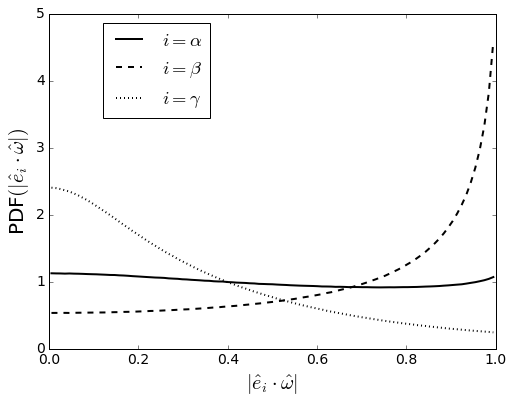

In [16]:
%%px
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
if(my_id==0):
    SIZE = 12
    plt.rc('font', size=SIZE) # controls default text sizes
    plt.rc('axes', titlesize=SIZE+4) # fontsize of the axes title
    plt.rc('axes', labelsize=SIZE+8) # fontsize of the x any y labels
    plt.rc('xtick', labelsize=SIZE+2) # fontsize of the tick labels
    plt.rc('ytick', labelsize=SIZE+2) # fontsize of the tick labels
    plt.rc('legend', fontsize=SIZE+6.5) # legend fontsize
    plt.rc('figure', titlesize=SIZE+4) # size of the figure title
    plt.figure(figsize=(8,6))
    lw=2;ms=10
    plt.plot(pdf_alfa[0],pdf_alfa[1],'-k',linewidth=lw,label='$i=\\alpha$')
    plt.plot(pdf_beta[0],pdf_beta[1],'--k',linewidth=lw,label='$i=\\beta$')
    plt.plot(pdf_gama[0],pdf_gama[1],':k',linewidth=lw,label='$i=\\gamma$')
    plt.axis([0,1,0,5])
    plt.xlabel('$|\hat{e}_i\cdot\hat{\omega}|$')
    plt.ylabel('PDF$(|\hat{e}_i\cdot\hat{\omega}|)$')
    plt.legend(loc='upper left',bbox_to_anchor=(0.1, 1.0),ncol=1,fancybox=False,shadow=False)
    #plt.title('Unfiltered')
    plt.show()

#### Calculate dissipation-rate, skewness and flatness of velocity derivatives

In [17]:
%%px
comm.Barrier(); t1=MPI.Wtime()
nu=0.000185
dissAvg=myQOI.GetDissipationrate(nu,A11,A12,A13,A21,A22,A23,A31,A32,A33)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    print(dissAvg)
    sys.stdout.write('Done!! cost= %0.2f seconds\n' %(t2-t1))

[stdout:1] 
[ 0.09221062]
Done!! cost= 20.48 seconds


In [8]:
%%px
comm.Barrier(); t1=MPI.Wtime()
nu=0.000185
eps=2.*nu*((A11*A11+A22*A22+A33*A33)+0.5*((A12+A21)**2+(A13+A31)**2+(A23+A32)**2))
locsum=np.float32(np.sum(eps))        
dissAvg=np.zeros(1,dtype='float32')        
comm.Allreduce([locsum,MPI.REAL],[dissAvg,MPI.REAL],op=MPI.SUM)

fldlen=np.float32(len(eps))
fldlenTot=np.zeros(1,dtype='float32')
comm.Allreduce([fldlen,MPI.REAL],[fldlenTot,MPI.REAL],op=MPI.SUM)

dissAvg=dissAvg/fldlenTot
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    print(dissAvg)
    sys.stdout.write('Done!! cost= %0.2f seconds\n' %(t2-t1))

[stdout:7] 
[ 0.09221062]
Done!! cost= 17.67 seconds


In [18]:
%%px
comm.Barrier(); t1=MPI.Wtime()
skns11=myStats.FindSkewness(A11)
skns22=myStats.FindSkewness(A22)
skns33=myStats.FindSkewness(A33)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    print(skns11,skns22,skns33)
    sys.stdout.write('Done!! cost= %0.2f seconds\n' %(t2-t1))

[stdout:1] 
[-0.59025568] [-0.55390888] [-0.57632071]
Done!! cost= 104.98 seconds


In [19]:
%%px
comm.Barrier(); t1=MPI.Wtime()
kurt11=myStats.FindKurtosis(A11)
kurt22=myStats.FindKurtosis(A22)
kurt33=myStats.FindKurtosis(A33)
comm.Barrier(); t2=MPI.Wtime()
if(my_id==0):
    print(kurt11,kurt22,kurt33)
    sys.stdout.write('Done!! cost= %0.2f seconds\n' %(t2-t1))

[stdout:1] 
[ 7.90126801] [ 7.75690413] [ 7.8567915]
Done!! cost= 102.89 seconds
